<a href="https://colab.research.google.com/github/ADMEricOliveiraDSA/an-lise-de-dados-semi-estruturado-/blob/master/Covid19_BR_18mai_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ANALISANDO DADOS DO COVID-19/BR , MAIS PRECISAMENTE NA BAHIA 

FONTE DOS DADOS ENCONTRA-SE :
https://Covid.saude.gov.br

In [0]:
# IMPORTANDO BIBLIOTECAS PARA ANÁLISES 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [0]:
# LENDO O ARQUIVO EXCEL COM PANDAS 
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/HIST_PAINEL_COVIDBR_20200517.xlsx')

In [0]:
# VENDO AS ULTIMAS 5 LINHAS DO DATASET 
df.tail()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
85588,Sul,RS,NaN,43,NaN,NaN,NaN,2020-05-13,20,11377239.0,2917,111,NaN,NaN
85589,Sul,RS,NaN,43,NaN,NaN,NaN,2020-05-14,20,11377239.0,2997,120,NaN,NaN
85590,Sul,RS,NaN,43,NaN,NaN,NaN,2020-05-15,20,11377239.0,3597,126,NaN,NaN
85591,Sul,RS,NaN,43,NaN,NaN,NaN,2020-05-16,20,11377239.0,3695,132,NaN,NaN
85592,Sul,RS,NaN,43,NaN,NaN,NaN,2020-05-17,21,11377239.0,3735,142,NaN,NaN


In [0]:
# VENDO INFORMAÇÕES SOBRE O DATASET 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85593 entries, 0 to 85592
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   regiao                 85593 non-null  object 
 1   estado                 85511 non-null  object 
 2   municipio              83250 non-null  object 
 3   coduf                  85593 non-null  int64  
 4   codmun                 83750 non-null  float64
 5   codRegiaoSaude         83250 non-null  float64
 6   nomeRegiaoSaude        83250 non-null  object 
 7   data                   85593 non-null  object 
 8   semanaEpi              85593 non-null  int64  
 9   populacaoTCU2019       85093 non-null  float64
 10  casosAcumulado         85593 non-null  int64  
 11  obitosAcumulado        85593 non-null  int64  
 12  Recuperadosnovos       29 non-null     float64
 13  emAcompanhamentoNovos  29 non-null     float64
dtypes: float64(5), int64(4), object(5)
memory usage: 9.1+ 

In [0]:
# LENDO AS COLUNAS DO DATASET 
df.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'obitosAcumulado', 'Recuperadosnovos',
       'emAcompanhamentoNovos'],
      dtype='object')

In [0]:
# VENDO VALORES ESTATÍSTICOS DO DATASET 
df.describe ()

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
count,85593.000000,83750.000000,83250.000000,85593.000000,8.509300e+04,85593.000000,85593.000000,29.000000,29.000000
mean,31.431531,315649.671654,31448.769333,18.101130,4.693863e+05,130.937577,8.736299,48853.034483,59081.620690
std,9.789804,96519.779654,9631.684296,1.883347,6.779322e+06,2625.619792,183.863783,22147.187270,36011.457026
min,11.000000,110000.000000,11001.000000,9.000000,1.112000e+03,0.000000,0.000000,22130.000000,14062.000000
25%,24.000000,241200.000000,24007.000000,17.000000,1.361600e+04,1.000000,0.000000,30152.000000,27531.000000
50%,31.000000,315080.000000,31057.000000,18.000000,2.918500e+04,3.000000,0.000000,42991.000000,51131.000000
75%,41.000000,410260.000000,41002.000000,20.000000,7.512000e+04,12.000000,1.000000,64957.000000,86619.000000
max,76.000000,530010.000000,53001.000000,21.000000,2.101471e+08,241080.000000,16118.000000,94122.000000,130840.000000


In [0]:
# ATRIBUINDO VARIÁVEL X A VALORES MÁXIMOS DAS COLUNAS SELECIONADAS 

x =df[['casosAcumulado', 'obitosAcumulado', 
     'Recuperadosnovos',
     'emAcompanhamentoNovos']].max ()

In [0]:
# RESULTADO NA TELA DAS COLUNAS SELECIONADAS POR VALOR MÁXIMO ATRAVÉS DA VARIÁVEL X 
x

casosAcumulado           241080.0
obitosAcumulado           16118.0
Recuperadosnovos          94122.0
emAcompanhamentoNovos    130840.0
dtype: float64

In [0]:
# LOCALIZANDO DENTRO DA COLUNA ESTADO OS VALORES REFERENTES A "BAHIA"
#VALORES MÁXIMOS DO ESTADO DA BAHIA NA DATA DE ÚLTIMA ATUALIZAÇÃO DO DATASET 

df.loc[df["estado"]=="BA"].max ()

regiao                      Nordeste
estado                            BA
coduf                             29
codmun                        293330
codRegiaoSaude                 29028
data                      2020-05-17
semanaEpi                         21
populacaoTCU2019         1.48731e+07
casosAcumulado                  8443
obitosAcumulado                  295
Recuperadosnovos                 NaN
emAcompanhamentoNovos            NaN
dtype: object

In [0]:
# ATRIBUINDO VARIÁVEL DF_BA AO OUTPUT ANTERIOR 
df_ba=df.loc[df["estado"]=="BA"]

In [0]:
# ATRIBUINDO VARIÁVEL BAHIA AOS DADOS DA VARIÁVEL DF_BDF_BA , FILTRANDO AS COLUNAS ABAIXO 

bahia = df_ba[['casosAcumulado','obitosAcumulado', 'Recuperadosnovos','emAcompanhamentoNovos']]

In [0]:
# EXIBINDO VARIÁVEL BAHIA FILTRADA 
#COLUNAS SELECIONADAS 
bahia

,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
28462,1,0,NaN,NaN
28463,1,0,NaN,NaN
28464,1,0,NaN,NaN
28465,2,0,NaN,NaN
28466,2,0,NaN,NaN
...,...,...,...,...
34118,6547,236,NaN,NaN
34119,6955,262,NaN,NaN
34120,8128,281,NaN,NaN
34121,8314,286,NaN,NaN


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

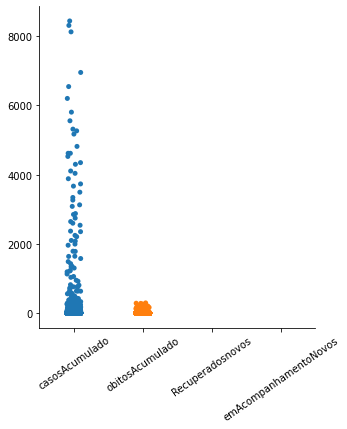

In [0]:
 # Gráfico exibindo didistribuição de casos acumulado e mortes acumuladas até a data da última atualização do DATASET 
 # Gráfico catplot da biblioteca seaborn 
sns.catplot(data=bahia)
plt.xticks(rotation=35)

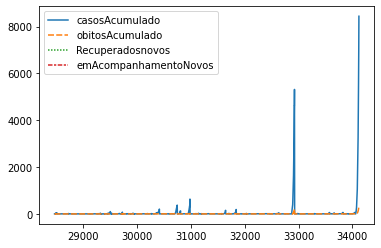

In [0]:
# Gráfico exibindo distribuição de casos confirmados e mortes acumuladas 
# Gráfico do tipo linha ,  da biblioteca seaborn 
sns.lineplot(data=bahia);